Lager en klasse Generation som skal ha verdier for beste fitness og gjennomsnittlige fitness.

In [1]:
import math
import time
import matplotlib.pyplot as plt
import numpy as np

class Gen:
    best_fitness: int
    avg_fitness: float

    def __init__(self, best, avg):
        self.best_fitness = best
        self.avg_fitness = avg

Klassen Evolution er lang, men inneholder alle funksjoner som trengs for en genetisk funksjon å funke.

Fitness: Den som er gitt i oppgaven.

Mutate:
Tar en verdi og gjør den om til et binært tall som en string.
Så sjekker den om lengden på tallet er rett, og eventuelt gjør det lengre for å passe.

Deretter vil metoden gå inn og endre noen av verdiene fra f.eks 1 til 0 for å mutere.

Crossover:
Tar for seg to forskjellige verdier (parents) og kombinerer disse inn til en ny verdi (child) som returneres.
Child returneres som en int.

Get_New_Combination:
Her blir crossover brukt for å finne en forbedret kombinasjon av parents.

Get_New_Generation:
Returnerer en ny generasjon.

In [2]:
class Evolution():
    def __init__(self, max=256, size=10, base=8):
        self.size = size
        self.base = base
        self.max = max
        self.generations = []
        self.start_gen = np.random.randint(0, max, size=size)
        self.generations.append(self.start_gen)
        self.target = np.random.randint(0, max)

    def fitness(self, x: int):
        return -abs(x - self.target)

    def mutate(self, x: int):
        start = np.random.randint(0, math.floor(self.base/2))
        end = np.random.randint(start, math.floor(self.base))
        x_str = str(bin(x))[2:]

        if len(x_str) != self.base:
            for i in range(self.base-len(x_str)):
                x_str = '0' + x_str

        x_str = list(x_str)
        for i in range(start, end):
            x_str[i] = '1' if x_str[i] == '0' else '0'

        return int(''.join(x_str), base=2)

    def crossover(self, x, y):
        rnd = np.random.randint(0, 2)
        x_str = str(bin(x if rnd == 0 else y))[2:]
        y_str = str(bin(x if rnd == 1 else y))[2:]
        n = 0
        if len(x_str) % 2 == 0:
            n = len(x_str) / 2
        else:
            if self.fitness(x if rnd == 0 else y) > self.fitness(x if rnd == 1 else y):
                n = math.ceil(len(x_str) / 2)
            else:
                n = math.floor(len(x_str) / 2)

        n = int(n)
        child = x_str[:n]+y_str[n:]
        return int(child, base=2)

    def get_new_combination(self, gen: zip):
        new_gen = []
        t = 0
        best = 0
        second = 0

        for i in range(len(gen)):
            if best > gen[i][0] > second != gen[i][1]:
                second = gen[i][1]

            if gen[i][0] > best != gen[i][1]:
                second = best
                best = gen[i][1]

        for i in gen:
            new_gen.append(self.crossover(i[1], best))
            new_gen.append(self.crossover(i[1], second))

        return new_gen

    def get_new_gen(self, old_gen):
        new_gen = self.get_new_combination(old_gen)

        for i in np.random.randint(0, self.size, size=math.floor(self.size/2)):
            new_gen[i] = self.mutate(new_gen[i])

        return new_gen

    def train(self):
        i = 0
        fs = []
        while True:

            fitnesses = [self.fitness(x) for x in self.generations[i]]
            fs.append(fitnesses)
            # Pick 5 best numbers
            gen = sorted(zip(fitnesses, self.generations[i]), reverse=True)[
                :(math.floor(self.size/2))]
            if max(fitnesses) == 0:
                print(self.generations)
                return [Gen(max(f), sum(f)/len(f)) for f in fs], self.generations

            new_gen = self.get_new_gen(gen)
            # print(new_gen)
            # print(self.target)
            self.generations.append(new_gen)

            i += 1

    def train_time(self):
        i = 0
        sts = []

        for t in range(20):
            print(i)
            st = time.time()
            while True:

                fitnesses = [self.fitness(x) for x in self.generations[i]]
                # Pick 5 best numbers
                gen = sorted(zip(fitnesses, self.generations[i]), reverse=True)[
                    :(math.floor(self.size/2))]
                if max(fitnesses) == 0:
                    et = time.time()
                    sts.append(et-st)
                    break
                # print(gen)
                new_gen = self.get_new_gen(gen)
                self.generations.append(new_gen)

                i += 1

        return sum(sts)/len(sts)

In [6]:
def print_info(gen, best, avg, i):
    print(f"Generation {i}, best: {best}, average: {avg}")
    print(gen)
    print("")

In [10]:
def task1():
    evo = Evolution()
    x_axis = []
    y_axis_best = []
    y_axis_avg = []

    genetic, genetics = evo.train()

    for i in range(len(genetics)):
        print_info(genetics[i], genetic[i].best_fitness, genetic[i].avg_fitness, i)
        x_axis.append(i)
        y_axis_best.append(genetic[i].best_fitness)
        y_axis_avg.append(genetic[i].avg_fitness)
    
    plt.plot(x_axis, y_axis_best, label="Best fitness", color="Red")
    plt.plot(x_axis, y_axis_avg, label="Average fitness", color="Blue")
    plt.xlabel("Runs")
    plt.ylabel("Red: Best, Blue: Avg")
    plt.show()
    print(f"Target: {evo.target}")
    print(f"Runs: {i}")

In [5]:
def task_1_2():
    n = np.arange(8, 18)
    time = []

    for i in range(8, 18):
        evo = Evolution(2**i, 20, i)
        time.append(evo.train_time())
        print(f"Done with: {2**i}")
        print(f"Target: {evo.target}")
    plt.xlabel("Bit length")
    plt.ylabel("Time (s)")
    plt.plot(n, time)
    plt.show()

[array([242,  66, 122, 217, 158, 130, 171, 122,  45, 171]), [242, 242, 205, 13, 10, 171, 10, 100, 98, 158], [15, 242, 242, 15, 205, 140, 14, 87, 9, 158], [15, 242, 15, 242, 205, 12, 154, 30, 8, 116], [239, 239, 14, 15, 205, 12, 134, 9, 116, 116], [209, 240, 239, 14, 205, 213, 134, 84, 116, 14], [109, 240, 14, 239, 37, 45, 113, 13, 12, 12], [15, 127, 14, 23, 113, 14, 109, 115, 25, 5], [15, 51, 14, 14, 14, 14, 29, 13, 6, 32], [120, 51, 32, 4, 7, 23, 3, 15, 3, 238], [14, 16, 120, 15, 11, 24, 244, 32, 5, 23], [15, 244, 15, 95, 64, 32, 6, 38, 5, 23], [255, 15, 95, 11, 8, 176, 4, 132, 32, 58], [15, 255, 11, 53, 196, 8, 23, 137, 7, 58], [255, 131, 116, 12, 137, 8, 231, 7, 53, 53], [231, 23, 79, 255, 8, 249, 8, 3, 116, 14], [15, 31, 231, 27, 7, 255, 52, 14, 79, 9], [46, 25, 15, 15, 9, 9, 52, 6, 31, 63], [255, 63, 6, 6, 5, 22, 127, 31, 6, 25], [15, 15, 15, 127, 155, 7, 7, 31, 24, 250], [115, 218, 121, 155, 15, 15, 7, 31, 24, 120], [13, 13, 9, 9, 15, 7, 15, 15, 206, 14], [206, 238, 143, 15, 15, 

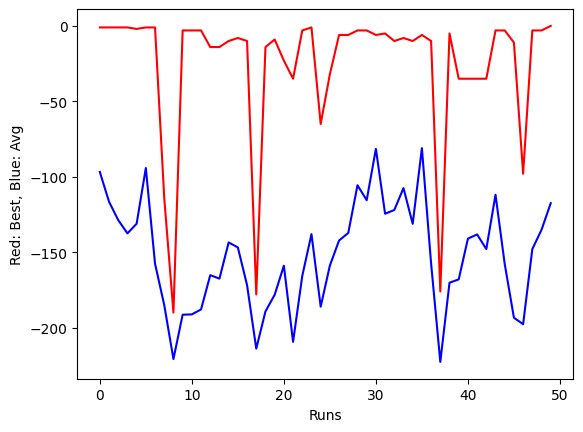

Target: 241
Runs: 49
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Done with: 256
Target: 60
0
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
Done with: 512
Target: 169
0
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
Done with: 1024
Target: 376
0
510
510
510
510
510
510
510
510
510
510
510
510
510
510
510
510
510
510
510
Done with: 2048
Target: 768
0
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
Done with: 4096
Target: 2037
0
1535
1535
1535
1535
1535
1535
1535
1535
1535
1535
1535
1535
1535
1535
1535
1535
1535
1535
1535
Done with: 8192
Target: 2614
0
6938
6938
6938
6938
6938
6938
6938
6938
6938
6938
6938
6938
6938
6938
6938
6938
6938
6938
6938
Done with: 16384
Target: 8808
0
1740
1740
1740
1740
1740
1740
1740
1740
1740
1740
1740
1740
1740
1740
1740
1740
1740
1740
1740
Done with: 32768
Target: 17027
0
3451
3451
3451
3451
3451
3451
3451
3451
3451
3451
3451
3451
3451
3451
3451
3451
3451
3451
3451
Done with: 65536
Target: 59415
0
36878
36878
36878
36878
36878
36878

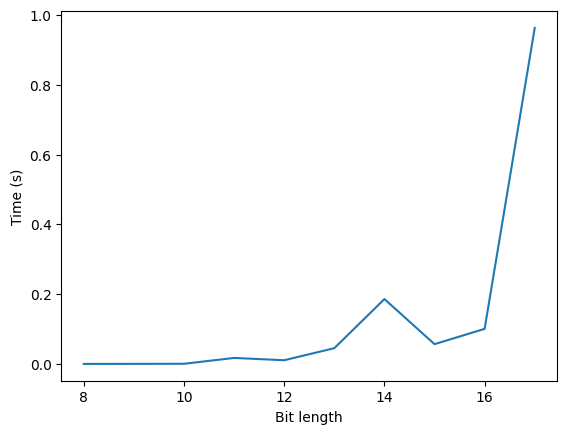

In [12]:
if __name__ == "__main__":
    task1()
    task_1_2()